In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def butterworth_filter(shape,D,order):
  rows,cols=shape
  center_row,center_col=rows//2,cols//2
  x=np.arange(cols)
  y=np.arange(rows)
  xx,yy=np.meshgrid(x,y)
  distance_squared=(xx-center_col)**2 + (yy-center_row)**2
  butterworth=1/(1+(distance_squared/D**2)**order)
  return butterworth

In [ ]:
def apply_filter(image,filter):
  f_image=np.fft.fft2(image)
  f_shifted=np.fft.fftshift(f_image)
  filterd=f_shifted*filter
  filtered_image=np.fft.ifft2(np.fft.ifftshift(filterd))
  filtered_image=np.abs(filtered_image)
  return filtered_image


<Figure size 640x480 with 0 Axes>

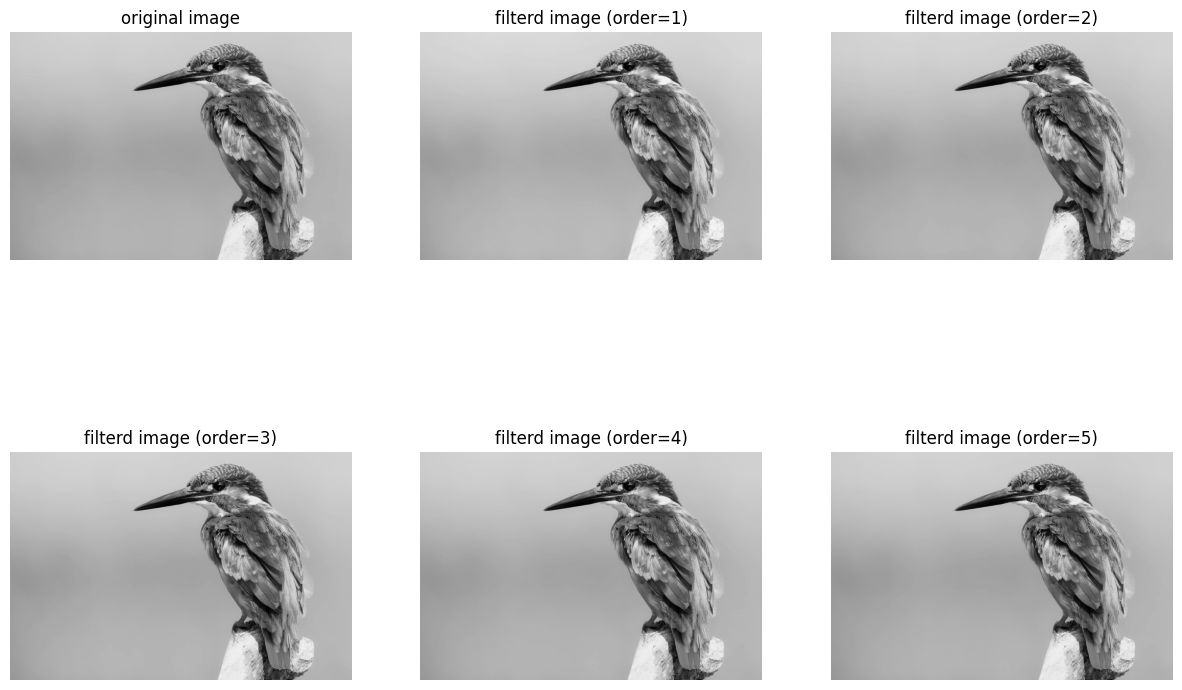

In [ ]:
def main():
  img=cv2.imread('/content/pexels-pixabay-326900.jpg',cv2.IMREAD_GRAYSCALE)
  D=1000
  filter_orders=[1,2,3,4,5]
  plt.figure(figsize=(15,10))
  plt.subplot(2,3,1)
  plt.imshow(img,cmap='gray')
  plt.title('original image')
  plt.axis('off')
  for i , order in enumerate(filter_orders):
    butterworth=butterworth_filter(img.shape,D,order)
    img_filtered=apply_filter(img,butterworth)
    plt.subplot(2,3,i+2)
    plt.imshow(img_filtered,cmap='gray')
    plt.title(f"filterd image (order={order})")
    plt.axis('off')
plt.tight_layout()
plt.show()

if __name__ == "__main__":
  main()
